In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import cv2
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D,Dense,Dropout,Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

"" Data Loading & Preprocessing""

In [2]:
data = os.listdir(r"C:\AI\Deep Learning\Rice_Image_Dataset")

In [3]:
classes = {"Arborio":0,"Basmati":1,"Ipsala":2,"Jasmine":3,"Karacadag":4}

In [4]:
x = []
y = []
for cls in classes:
    path = "C:\AI\Deep Learning\Rice_Image_Dataset/" +cls
    for i in os.listdir(path)[:1500:]:
        img  = cv2.imread(path + "/" + i,0)
        img = cv2.resize(img,(200,200))
        x.append(img)
        y.append(classes[cls])

<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
C:\Users\mayas\AppData\Local\Temp\ipykernel_13632\1075890048.py:4: SyntaxWarning: invalid escape sequence '\A'
  path = "C:\AI\Deep Learning\Rice_Image_Dataset/" +cls


In [5]:
np.unique(y)

array([0, 1, 2, 3, 4])

In [6]:
x = np.array(x)
y = np.array(y)

In [7]:
x.shape

(7500, 200, 200)

""Change Dimension""

In [8]:
x = np.expand_dims(x,axis =-1)

In [9]:
x.shape

(7500, 200, 200, 1)

In [10]:
pd.Series(y).value_counts()

0    1500
1    1500
2    1500
3    1500
4    1500
Name: count, dtype: int64

In [11]:
y.shape

(7500,)

"" Image Data Splitting""

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [13]:
X_train = X_train/255
X_test = X_test/255
print(X_train)
print(X_test)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

""CNN Architecture Design (Convolution Layer + Flattening Layer + Fully Connected Layer + Output Layer)""

In [14]:
model = Sequential([
    Conv2D(64, (3,3), activation="relu", padding="same", input_shape=(200,200,1)),
    MaxPooling2D(2,2),

    Conv2D(32, (3,3), activation="relu", padding="same"),
    MaxPooling2D(2,2),
    Dropout(0.2),

    # Conv2D(32, (3,3), activation="relu", padding="same"),
    # MaxPooling2D(2,2),

    Conv2D(32, (3,3), activation="relu", padding="same"),
    MaxPooling2D(2,2),

    Conv2D(20, (3,3), activation="relu", padding="same"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(8, activation="relu"),
    Dense(5, activation="softmax")
]
)

C:\Users\mayas\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


""Model Compilation""

In [15]:
model.compile(optimizer = Adam(learning_rate = 0.002),loss='sparse_categorical_crossentropy', metrics = ["accuracy"])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 200, 200, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 100, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 25, 25, 20)          │           5,780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2880)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │          23,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              45 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,225 (223.54 KB)

 Trainable params: 57,225 (223.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
X_train.shape

(6000, 200, 200, 1)

""Model Training""

In [18]:
model.fit(X_train, y_train, epochs = 15, batch_size = 32, validation_split = 0.2)

Epoch 1/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.6704 - loss: 0.8591 - val_accuracy: 0.7867 - val_loss: 0.6614
Epoch 2/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.8512 - loss: 0.5427 - val_accuracy: 0.8750 - val_loss: 0.4685
Epoch 3/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.9017 - loss: 0.4361 - val_accuracy: 0.9458 - val_loss: 0.3640
Epoch 4/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.9292 - loss: 0.3638 - val_accuracy: 0.9175 - val_loss: 0.3406
Epoch 5/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 180s 997ms/step - accuracy: 0.9354 - loss: 0.3318 - val_accuracy: 0.9417 - val_loss: 0.2865
Epoch 6/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 2934s 19s/step - accuracy: 0.9385 - loss: 0.2931 - val_accuracy: 0.9525 - val_loss: 0.2911
Epoch 7/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.9569 - loss: 0.2583 - val_accuracy: 0.9550 - val_loss: 0.2250
Epoch 8/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.9569 - loss: 0.2232 - val

"" Model Evaluation""

In [19]:
y_pred = model.predict(X_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 289ms/step


""Model Accuracy""

In [26]:
loss, acc = model.evaluate(X_test, y_test)
print("Test accuracy:", acc)

47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 374ms/step - accuracy: 0.9740 - loss: 0.1654
Test accuracy: 0.9739999771118164


""Accuracy & Loss Plot""

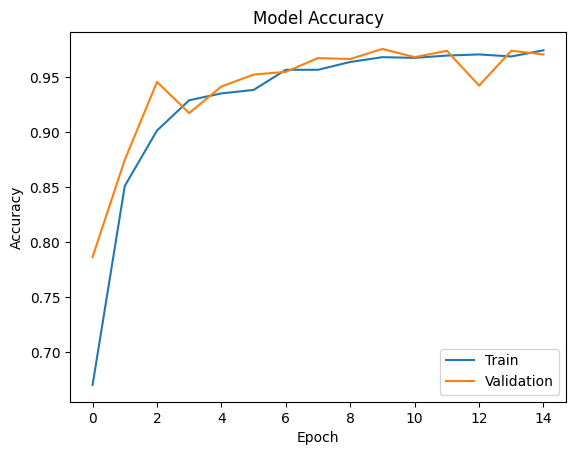

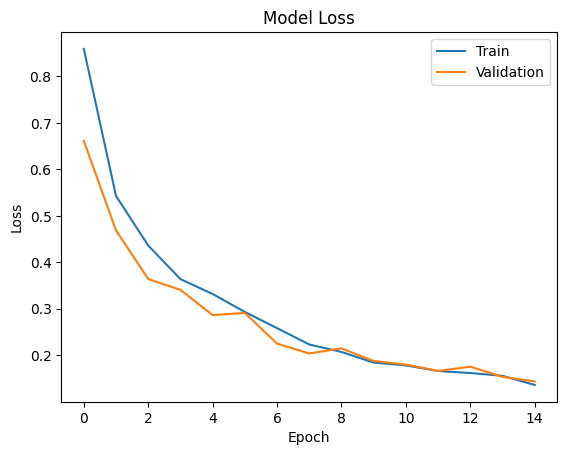

In [31]:
# Accuracy plot
plt.figure()
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Loss plot
plt.figure()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

""confusion matrix""

47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 355ms/step


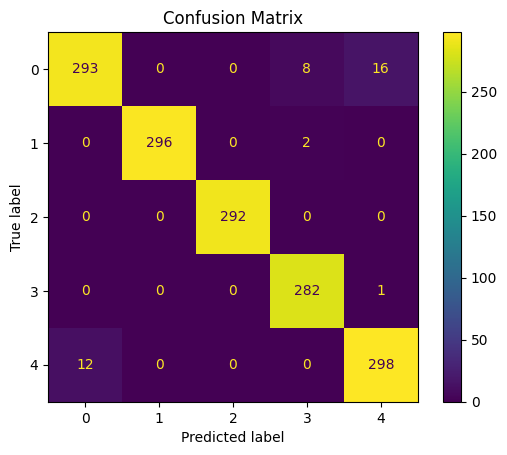

In [33]:
# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

""Model save""

In [34]:
model.save("Rice_cnn_Model.h5")